In [50]:
import os
from collections import Counter
import numpy as np
from pyhanlp import *
import pandas as pd

# 词频与词排名的关系

In [54]:
!pip install test_utility

  Could not find a version that satisfies the requirement test_utility (from versions: )
No matching distribution found for test_utility
You are using pip version 10.0.1, however version 20.3.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [ ]:
# from test_utility import ensure_data
# sighan05 = ensure_data('icwb2-data','http://sighan.cs.uchicago.edu/bakeoff2005/data/icwb2-data.zip')

## icwb2-data
icwb2-data是一个中文分词数据集
sighan05是icwb2-data最终需要存放的路径

In [56]:
 sighan05 = r'D:\Anaconda\Lib\site-packages\pyhanlp\static\data\test\icwb2-data'

os.oath.join()是os库中用于路径拼接的方法，下面代码是在sighan05路径后拼接training和msr_training.utf8

os.oath.join()用法：  
（1）如果各组件名首字母不包含’/’，则函数会自动加上  
（2）如果有一个组件是一个绝对路径，则在它之前的所有组件均会被舍弃  
（3）如果最后一个组件为空，则生成的路径以一个’/’分隔符结尾  

In [69]:
msr = os.path.join(sighan05,'training','msr_training.utf8')
msr

'D:\\Anaconda\\Lib\\site-packages\\pyhanlp\\static\\data\\test\\icwb2-data\\training\\msr_training.utf8'

In [64]:
f = Counter()
with open(msr,encoding='utf-8') as src:
    for line in src:
        line = line.strip()
        for word in line.split(' '):
            f[word] += 1

### 词的性质-齐夫定律

[('，', 173173), ('的', 128146), ('。', 81757), ('、', 40695), ('在', 28445), ('了', 27103), ('和', 24398), ('是', 18068), ('”', 16867), ('“', 16686), ('一', 11503), ('有', 9905), ('对', 9654), ('为', 9516), ('中', 9444), ('上', 8408), ('不', 7222), ('这', 7198), ('与', 7197), ('他', 7062), ('就', 6485), ('人', 6338), ('到', 6316), ('等', 6008), ('：', 5988), ('发展', 5976), ('说', 5973), ('也', 5801), ('要', 5660), ('将', 5651)]


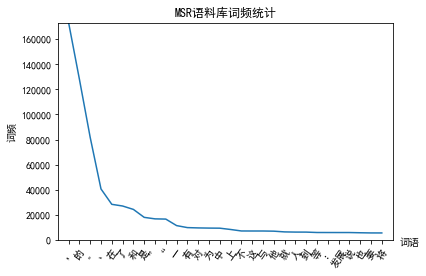

In [79]:
def plot(token_counts, title='MSR语料库词频统计', ylabel='词频'):
    from matplotlib import pyplot as plt
    plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
    plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号
    fig = plt.figure(
        # figsize=(8, 6)
    )
    ax = fig.add_subplot(111)
    token_counts = list(zip(*token_counts))
    num_elements = np.arange(len(token_counts[0]))
    top_offset = max(token_counts[1]) + len(str(max(token_counts[1])))
    ax.set_title(title)
    ax.set_xlabel('词语')
    ax.set_ylabel(ylabel)
    ax.xaxis.set_label_coords(1.05, 0.015)
    ax.set_xticks(num_elements)
    ax.set_xticklabels(token_counts[0], rotation=55, verticalalignment='top')
    ax.set_ylim([0, top_offset])
    ax.set_xlim([-1, len(token_counts[0])])
    rects = ax.plot(num_elements, token_counts[1], linewidth=1.5)
    plt.show()


word_freq = f.most_common(30)
print(word_freq)
plot(word_freq)
# log_word_freq = []
# for w, f in word_freq:
#     log_word_freq.append((w, np.log(f)))
# plot(log_word_freq, ylabel='词频的对数')

In [70]:
import os
print(os.path.abspath('.'))

E:\王泓儒\NLP\练习代码\Untitled Folder


加载迷你词典

In [75]:
def load_dictionary():
    """
    加载HanLP中的mini词库
    :return: 一个set形式的词库
    """
    #JClass是是连通python和java的桥梁，用来根据java路径名得到一个python类
    
    #利用JClass取得HanLP中的IOUtil工具类
    IOUtil = JClass('com.hankcs.hanlp.corpus.io.IOUtil')
    #取得了HanLP的配置项Config中的词典路径
    path = HanLP.Config.CoreDictionaryPath.replace('.txt', '.mini.txt')
    #调用IOUtil的静态方法loadDictionary
    dic = IOUtil.loadDictionary([path])
    return set(dic.keySet())

In [78]:
 dic = load_dictionary()
 dic

{'锤头',
 '轻嘴薄舌',
 '平展',
 '毁于一旦',
 '脑门',
 '代发',
 '洗发剂',
 '沙金',
 '名列前茅',
 '铜山县',
 '陈腐',
 '出巡',
 '伙同',
 '邻邦',
 '马里兰州',
 '冥器',
 '末##末',
 '眼福',
 '剑拔弩张',
 '博大胸怀',
 '堆',
 '深浅',
 '短',
 '餐椅',
 '抑制',
 '谣',
 '过手',
 '逃之夭夭',
 '锁边',
 '团县委',
 '内聚力',
 '文盲',
 '皇族',
 '谋略家',
 '夸夸其谈',
 '硬玉',
 '批示',
 '王储',
 '上马',
 '消防队',
 '餐饮店',
 '绊马索',
 '发令枪',
 '优待券',
 '天星村',
 '扎西',
 '拥有率',
 '学期',
 '观测网',
 '大阪府',
 '少待',
 '信义',
 '畜禽',
 '横线',
 '圄',
 '离不开',
 '阿爹',
 '鼠胆',
 '名专栏',
 '夹被',
 '亲昵',
 '大跌',
 '传达',
 '拼刺',
 '威舍',
 '悠悠',
 '弼',
 '甜头',
 '接风',
 '安琪儿',
 '来之不易',
 '吃偏饭',
 '竹浆',
 '乐不思蜀',
 '折服',
 '马格里布',
 '靥',
 '公主',
 '狂气',
 '钓具',
 '织锦',
 '谷城县',
 '有张有弛',
 '汪洋恣肆',
 '浑浊',
 '路沿',
 '彻',
 '鉴定书',
 '签名',
 '蹩脚货',
 '隐火',
 '竹马',
 '卸职',
 '先进岗',
 '杀人',
 '长剑',
 '太岁',
 '营利',
 '炸糕',
 '要不得',
 '细小',
 '钷',
 '博学',
 '嵊',
 '长方体',
 '甘油',
 '斋月灯',
 '核定',
 '台商',
 '黑马',
 '老辈',
 '柔弱',
 '心照不宣',
 '牵制',
 '贫困帽子',
 '爪牙',
 '天赋',
 '进餐',
 '各自',
 '康',
 '存贷',
 '顽症',
 '孤儿',
 '粮站',
 '打折',
 '一尘不染',
 '玉版纸',
 '铜钹',
 '坟',
 '一木难支',
 '普列谢茨克',
 '涠',
 '出尔反尔',
 '不法之徒',
 '拒绝'

In [76]:
print(len(dic))
print(list(dic)[0])

85584
锤头


# 切分算法

完全切分算法：找出一段文本中的所有单词

In [86]:
def fully_segment(text, dic):
    word_list = []
    for i in range(len(text)):                  # i 从 0 到text的最后一个字的下标遍历
        for j in range(i + 1, len(text) + 1):   # j 遍历[i + 1, len(text)]区间
            word = text[i:j]                    # 取出连续区间[i, j]对应的字符串
            if word in dic:                     # 如果在词典中，则认为是一个词
                word_list.append(word)
    return word_list

dic = load_dictionary()
print(fully_segment('商品和服务', dic))
print(fully_segment('就读北京大学', dic))

['商', '商品', '品', '和', '和服', '服', '服务', '务']
['就', '就读', '读', '北', '北京', '北京大学', '京', '大', '大学', '学']


正向最长匹配：从前到后，依次输出可能的最长单词

In [87]:
def forward_segment(text, dic):
    word_list = []
    i = 0
    while i < len(text):
        longest_word = text[i]                      # 当前扫描位置的单字
        for j in range(i + 1, len(text) + 1):       # 所有可能的结尾
            word = text[i:j]                        # 从当前位置到结尾的连续字符串
            if word in dic:                         # 在词典中
                if len(word) > len(longest_word):   # 并且更长
                    longest_word = word             # 则更优先输出
        word_list.append(longest_word)              # 输出最长词
        i += len(longest_word)                      # 正向扫描
    return word_list


dic = load_dictionary()
print(forward_segment('就读北京大学', dic))
print(forward_segment('研究生命起源', dic))

['就读', '北京大学']
['研究生', '命', '起源']


逆向最长匹配：从后到前，依次输出可能的最长单词

In [88]:
def backward_segment(text, dic):
    word_list = []
    i = len(text) - 1
    while i >= 0:                                   # 扫描位置作为终点
        longest_word = text[i]                      # 扫描位置的单字
        for j in range(0, i):                       # 遍历[0, i]区间作为待查询词语的起点
            word = text[j: i + 1]                   # 取出[j, i]区间作为待查询单词
            if word in dic:
                if len(word) > len(longest_word):   # 越长优先级越高
                    longest_word = word
                    break
        word_list.insert(0, longest_word)           # 逆向扫描，所以越先查出的单词在位置上越靠后
        i -= len(longest_word)
    return word_list


dic = load_dictionary()
print(backward_segment('研究生命起源', dic))

['研究', '生命', '起源']


双向最长匹配：同时执行正向和逆向  
（1）如果两者词数不同，则返回词数更少的哪一个  
（2）如果两者词数相同，则返回两者中单字更少的那个  
（3）如果单字数目也相同，就返回逆向最长匹配的结果

In [90]:
def count_single_char(word_list: list):  # 统计单字成词的个数
    return sum(1 for word in word_list if len(word) == 1)


def bidirectional_segment(text, dic):
    f = forward_segment(text, dic)
    b = backward_segment(text, dic)
    if len(f) < len(b):                                  # 词数更少优先级更高
        return f
    elif len(f) > len(b):
        return b
    else:
        if count_single_char(f) < count_single_char(b):  # 单字更少优先级更高
            return f
        else:
            return b                                     # 都相等时逆向匹配优先级更高



dic = load_dictionary()
print(bidirectional_segment('研究生命起源', dic))

['研究', '生命', '起源']


分词速度

In [93]:
import time
def evaluate_speed(segment, text, dic):
    start_time = time.time()
    for i in range(pressure):
        segment(text, dic)
    elapsed_time = time.time() - start_time
    print('%.2f 万字/秒' % (len(text) * pressure / 10000 / elapsed_time))


    
text = "江西鄱阳湖干枯，中国最大淡水湖变成大草原"
pressure = 10000
dic = load_dictionary()

print('由于JPype调用开销巨大，以下速度显著慢于原生Java')
evaluate_speed(forward_segment, text, dic)
evaluate_speed(backward_segment, text, dic)
evaluate_speed(bidirectional_segment, text, dic)
print('由此可见，双向匹配最快，大概是正向和逆向的1/2，因为双向做了两倍的工作')

由于JPype调用开销巨大，以下速度显著慢于原生Java
67.30 万字/秒
65.53 万字/秒
29.06 万字/秒
由此可见，双向匹配最快，大概是正向和逆向的1/2，因为双向做了两倍的工作


# 字典树

In [95]:
class Node(object):
    def __init__(self, value) -> None:
        self._children = {}
        self._value = value

    def _add_child(self, char, value, overwrite=False):
        child = self._children.get(char)
        if child is None:
            child = Node(value)
            self._children[char] = child
        elif overwrite:
            child._value = value
        return child


class Trie(Node):
    def __init__(self) -> None:
        super().__init__(None)

    def __contains__(self, key):
        return self[key] is not None

    def __getitem__(self, key):
        state = self
        for char in key:
            state = state._children.get(char)
            if state is None:
                return None
        return state._value

    def __setitem__(self, key, value):
        state = self
        for i, char in enumerate(key):
            if i < len(key) - 1:
                state = state._add_child(char, None, False)
            else:
                state = state._add_child(char, value, True)


trie = Trie()
# 增
trie['自然'] = 'nature'
trie['自然人'] = 'human'
trie['自然语言'] = 'language'
trie['自语'] = 'talk	to oneself'
trie['入门'] = 'introduction'
assert '自然' in trie
# 删
trie['自然'] = None
assert '自然' not in trie
# 改
trie['自然语言'] = 'human language'
assert trie['自然语言'] == 'human language'
# 查
assert trie['入门'] == 'introduction'